In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.models import load_model

Using TensorFlow backend.


In [59]:
df = pd.read_csv( '../../DataSets/mnist_test.csv' )
data = df.values
print data.shape

(9999, 785)


In [102]:
model = load_model( 'DigitRecognition.h5' )

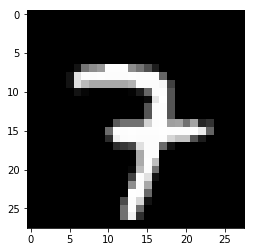

In [103]:
n = np.random.choice( data.shape[0] )
img = data[n,1:].reshape( (28,28) )
plt.imshow( img, cmap='gray' )
plt.show()

In [104]:
predict_image = data[n,1:].reshape( (-1,28,28,1) )
predict_image = predict_image/255.0
print predict_image.shape

(1, 28, 28, 1)


In [105]:
res = model.predict( predict_image, batch_size=20 )
max_ind = res.argmax()
print "Predicted Value is", max_ind, "with confidence", 100*res[0,max_ind]
print "Real Value is ", int(data[n,0])

Predicted Value is 7 with confidence 99.9970674515
Real Value is  7


In [106]:
score = 0.0
for i in range(data.shape[0]):
    predict_image = data[i,1:].reshape( (-1,28,28,1) )
    predict_image = predict_image/255.0
    res = model.predict( predict_image, batch_size=20 )
    score += res.argmax() == int(data[i,0])

score = score/data.shape[0]

In [107]:
print score*100

98.99989999
